# Machine Learning Homework1
K nearest neighbor calculation and plot 
 Kyle 2018/09/26


## Import packages and check working directory 


In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [5]:
os.getcwd()

'C:\\Users\\kyle1'

## Read files and clean dataset

In [6]:
data=pd.read_csv('tensor_10_2.csv',header=None)

In [7]:
temp=np.array(data)

## Calculate distance squared(method 1)

In [8]:
dist_sq = np.sum((temp[:,np.newaxis,:]-temp[np.newaxis,:,:])**2, axis=-1)

In [97]:
#check if diagonal are all 0s
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Calculate distance squared(method 2)

In [18]:
temp1=np.broadcast_to(temp[np.newaxis,:,:],(10,10,2))
temp2=np.broadcast_to(temp[:,np.newaxis,:],(10,10,2))

In [20]:
differences=temp[:,np.newaxis,:]-temp[np.newaxis,:,:]

In [22]:
sq_differences=differences**2

In [26]:
dist_sq=sq_differences.sum(axis=-1)

In [27]:
#check if diagonal are all 0s
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Find nearest distance to a certain point

In [11]:
nearest=np.argsort(dist_sq, axis=1)
nearest

array([[0, 8, 3, 5, 1, 7, 9, 4, 6, 2],
       [1, 8, 5, 0, 3, 6, 4, 9, 7, 2],
       [2, 9, 4, 7, 6, 0, 3, 8, 1, 5],
       [3, 0, 8, 5, 1, 7, 9, 4, 2, 6],
       [4, 9, 2, 6, 7, 1, 0, 8, 3, 5],
       [5, 8, 0, 1, 3, 6, 4, 7, 9, 2],
       [6, 4, 1, 8, 9, 2, 0, 5, 7, 3],
       [7, 9, 2, 3, 4, 0, 8, 1, 5, 6],
       [8, 1, 0, 5, 3, 6, 4, 9, 7, 2],
       [9, 2, 7, 4, 0, 6, 3, 8, 1, 5]], dtype=int64)

In [12]:
K=4
nearest_partition=np.argpartition(dist_sq,K+1,axis=1)
nearest_partition

array([[3, 8, 0, 5, 1, 7, 9, 6, 2, 4],
       [1, 8, 5, 0, 3, 6, 4, 7, 2, 9],
       [2, 9, 4, 7, 6, 0, 1, 5, 8, 3],
       [3, 8, 0, 5, 1, 7, 9, 6, 2, 4],
       [4, 9, 2, 6, 7, 1, 0, 3, 8, 5],
       [5, 8, 1, 0, 3, 6, 4, 7, 2, 9],
       [1, 4, 8, 6, 9, 2, 0, 5, 3, 7],
       [7, 9, 2, 3, 4, 0, 8, 1, 6, 5],
       [1, 8, 0, 5, 3, 6, 4, 7, 2, 9],
       [7, 9, 2, 4, 0, 6, 5, 3, 8, 1]], dtype=int64)

## Plot in Graph using matplotlib

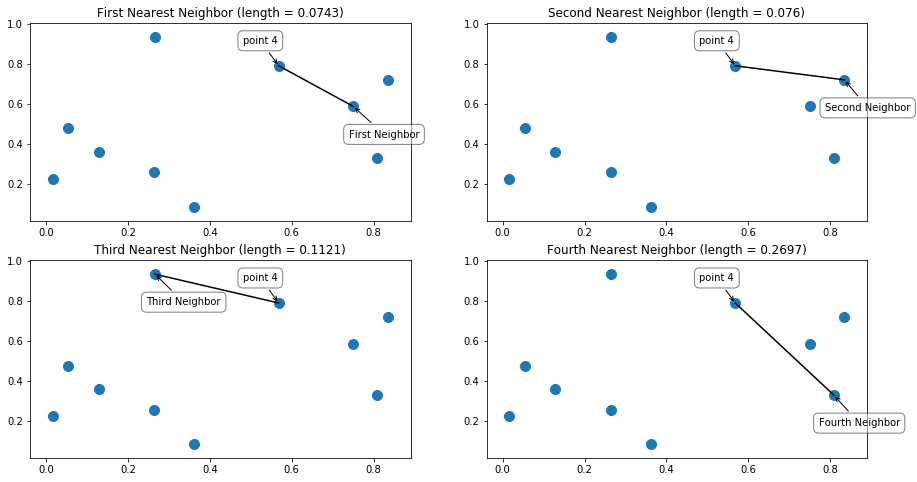

In [94]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
k=1
list_name=["First","Second","Third","Fourth"]
for i in range(2):
    for j in range(2):
        ax[i,j].scatter(temp[:,0],temp[:,1],s=100)
        ax[i,j].plot(*zip(temp[nearest_partition[4][0]],temp[nearest_partition[4][k]]),color='black')
        #point out point 4
        ax[i,j].annotate("point 4",xy=data.iloc[4],xytext=(-1,20),textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        #point out neighbor 
        ax[i,j].annotate(list_name[k-1] + " Neighbor",xy=data.iloc[nearest_partition[4][k]],xytext=(66,-33),textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        #Set titles
        ax[i,j].set_title(list_name[k-1]+' Nearest Neighbor (length = '+ str(round(dist_sq[4][nearest_partition[4][k]],4)) + ')')
        k=k+1
plt.show()